**Instaling Dependencies: Ensure we are having the following libraries installed**

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

**Loading the datset.**

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload the file

Saving breast cancer.csv to breast cancer.csv


In [ ]:
import pandas as pd

# Load the dataset
dataset_path = "breast cancer.csv"
df = pd.read_csv(dataset_path)

In [ ]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

**Exploring the datset**

In [ ]:
print(df.shape)

(569, 33)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**removing irrelevant attributes**

In [ ]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

**Encoding the diagnosis Column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # 'M' -> 1, 'B' -> 0

**Confirming changes**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Data Visualization**

Bar chart to show the proportion f Malignant M and benign B cases in dataset

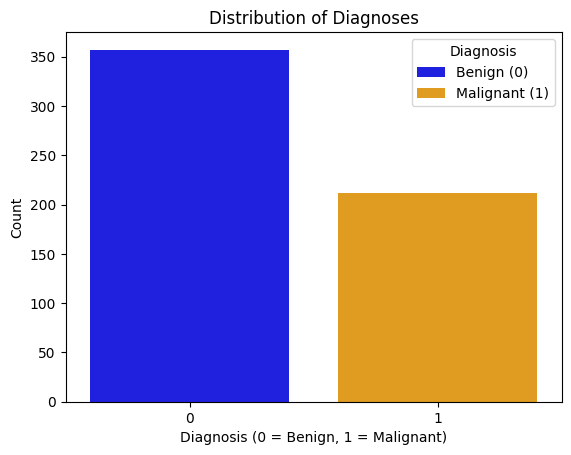

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map colors explicitly for the categories
colors = {0: 'blue', 1: 'orange'}


sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette=colors, dodge=False)
plt.title('Distribution of Diagnoses')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

Histogram of key features.Visualizing the distribution of tumor radius

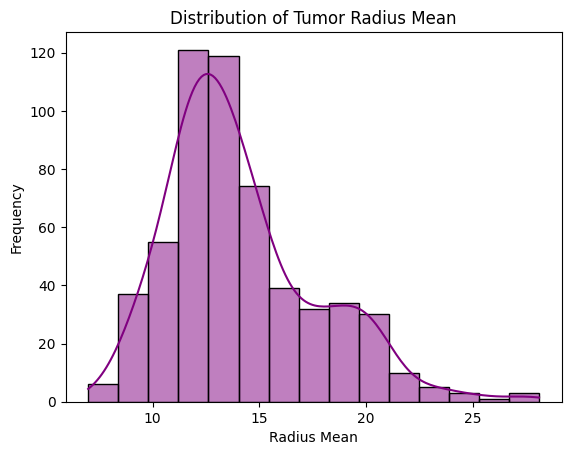

In [ ]:
import seaborn as sns

sns.histplot(df['radius_mean'], kde=True, bins=15, color='purple')
plt.title('Distribution of Tumor Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

Scatterplot of two features scatter plot with diagnosis as the hue to see how features vary between classes

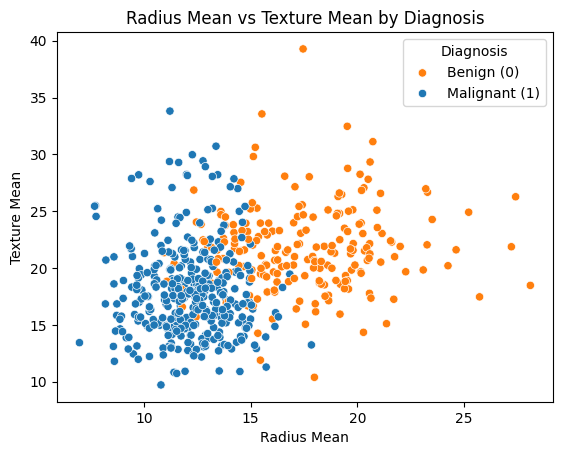

In [ ]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title('Radius Mean vs Texture Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

Heatmap of correlations to explore relationships between features. This helps identify highly correlated features

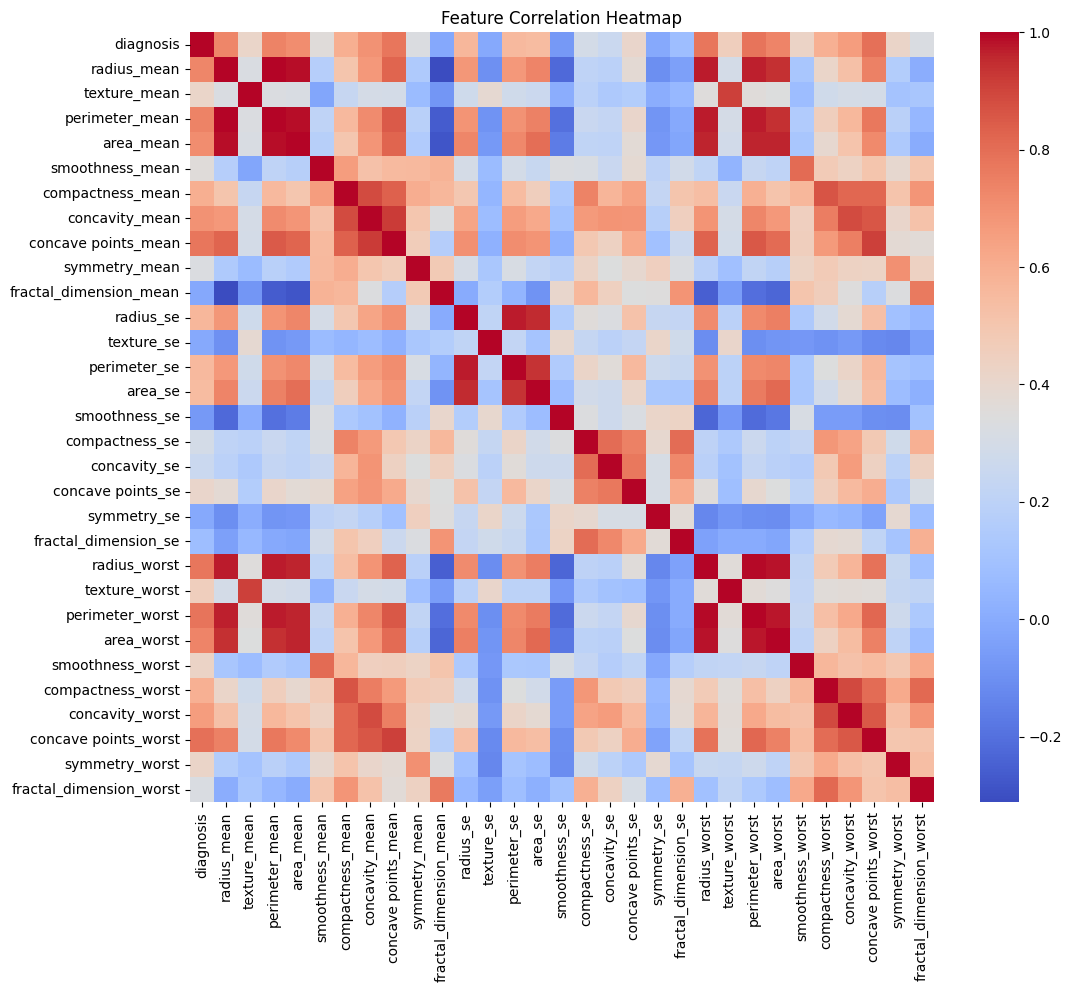

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Pair Plot for selected features visualizing relationships between a few selected features

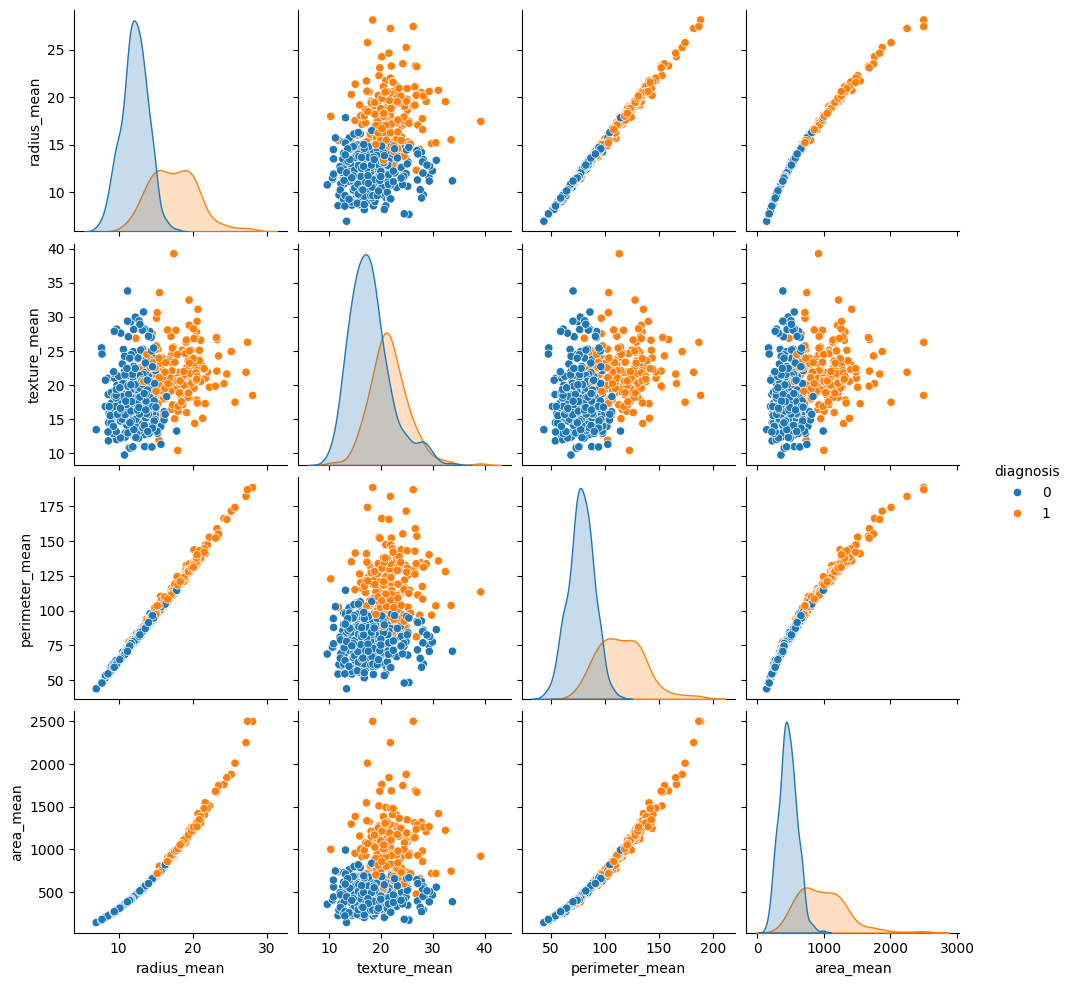

In [ ]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean' ,'diagnosis']], hue='diagnosis')
plt.show()

**The diagnosis column contains categorical values ('M' for Malignant and 'B' for Benign). So we need to convert these into numeric values. And we have already performed this step while** "***Exploring the dataset***"

Now Selecting the Features (X) and Target (y)

**Here we are separating the features (independent variables) and the target (dependent variable).**

In [ ]:
# Selecting features (all columns except 'diagnosis')
X = df.drop('diagnosis', axis=1)

# Selecting the target (diagnosis column)
y = df['diagnosis']

**Normalizing the Features**

This method ensures that the data to have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the feature set
X = scaler.fit_transform(X)

**Now, Spliting the Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale features (optional)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 455
Testing samples: 114


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Logistic Regression Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Decision Tree Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Random Forest Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Naïve Bayes Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349


**Visualizing the Results**

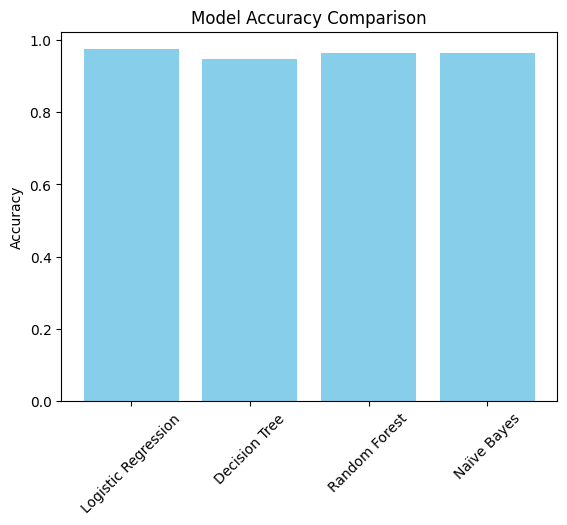

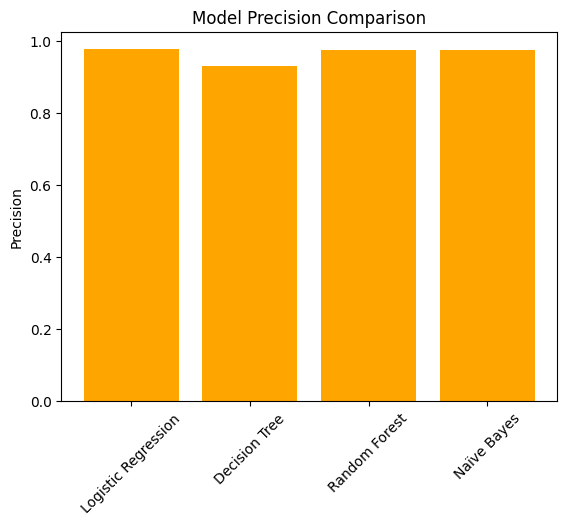

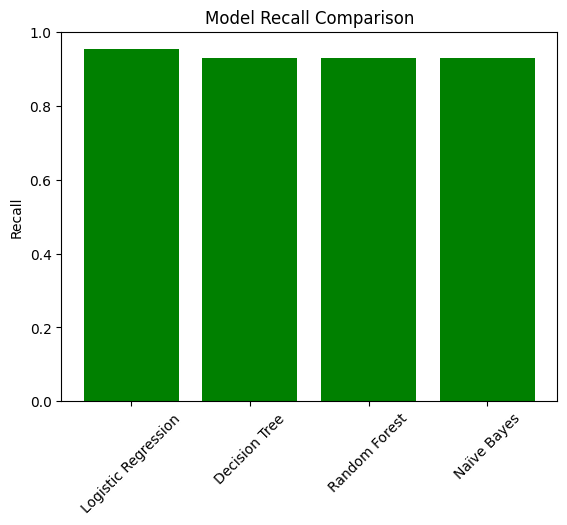

In [2]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naïve Bayes']
accuracy = [ 0.9737, 0.9474, 0.9649, 0.9649]
precision = [ 0.9762, 0.9302, 0.9756, 0.9756]
recall = [ 0.9535, 0.9302, 0.9302, 0.9302]

# Plotting Accuracy
plt.bar(models, accuracy, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Plotting Precision
plt.bar(models, precision, color='orange')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

# Plotting Recall
plt.bar(models, recall, color='green')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

**Conclusion**:

Logistic Regression emerged as the most reliable model, achieving the highest accuracy (97.37%), precision (97.62%), and recall (95.35%).

Random Forest and Naïve Bayes also performed well, with identical precision and recall scores.


Decision Tree, though interpretable, had slightly lower accuracy and precision compared to Random Forest.

**Recommendations:**

For clinical applications where minimizing missed malignant cases is critical, Logistic Regression is the best choice.

Random Forest is a close second and is suitable for robust and scalable implementations.

**Future work could include:**

Hyperparameter tuning for all models to further enhance performance.

Using ensemble techniques like boosting (e.g., XGBoost).

Addressing class imbalance with resampling techniques such as SMOTE.